In [374]:
import pandas as pd
import numpy as np
import pickle

In [375]:
data = pd.read_pickle("../src/original_data/covid_data_2020_03.pickle")
data

,,support_no_visitors,support_curfew_high_risk,support_curfew_non_crucial,hours_workplace,hours_home,p_2m_employee_keep,p_2m_employee_keep_gov,p_2m_employee_other,date_fieldwork,questionnaire_difficult,...,gov_action_approp,gov_action_insuff,save_banks,help_pension_funds,p_2m_employee_lost,no_emergency_cc_note_drop,note_survey,age_sex_marital_weighting,mhi5_7d,hours_total
personal_id,month,,,,,,,,,,,,,,,,,,,,,
800085,2020-03-01,agree,totally agree,agree,24.0,2.0,100.0,0.0,0.0,202003.0,1 definitely not,...,agree,neither/nore,agree,neither/nore,0.0,NaN,,1.425745,84.0,26.0
800100,2020-03-01,totally agree,totally agree,totally agree,70.0,0.0,50.0,20.0,15.0,202003.0,1 definitely not,...,agree,agree,totally disagree,totally disagree,15.0,NaN,ze moeten het snel verhelpen en de gene die de...,1.131753,60.0,70.0
800131,2020-03-01,totally agree,totally agree,totally agree,NaN,NaN,NaN,NaN,NaN,202003.0,1 definitely not,...,totally agree,totally disagree,totally agree,totally agree,NaN,NaN,Het enige wat ik zou willen dat de mensen de r...,0.568763,72.0,NaN
800161,2020-03-01,agree,agree,agree,30.0,5.0,NaN,NaN,NaN,202003.0,1 definitely not,...,totally agree,totally disagree,agree,agree,NaN,NaN,Als fysiotherapiepraktijk is het erg moeilijk ...,1.190323,76.0,35.0
800170,2020-03-01,agree,agree,agree,40.0,0.0,50.0,50.0,0.0,202003.0,1 definitely not,...,agree,disagree,totally agree,totally agree,0.0,NaN,Ja wij...( zorgverleners en leraren ) worden e...,0.761780,68.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899928,2020-03-01,agree,disagree,agree,NaN,NaN,NaN,NaN,NaN,202003.0,4,...,agree,disagree,disagree,agree,NaN,NaN,,0.741906,76.0,NaN
899934,2020-03-01,totally agree,totally agree,neither/nore,0.0,0.0,NaN,NaN,NaN,202003.0,4,...,neither/nore,neither/nore,neither/nore,neither/nore,NaN,NaN,,1.312963,60.0,0.0
899946,2020-03-01,totally agree,agree,disagree,NaN,NaN,NaN,NaN,NaN,202003.0,5 certainly yes,...,agree,neither/nore,neither/nore,agree,NaN,NaN,Houd er rekening mee dat ik al een jaar thuisz...,2.051511,44.0,NaN


In [376]:
#list(data.columns)

In [377]:
Q3_Q10 = data[['avoid_busy_places','avoid_public_places','maintain_distance','adjust_school_work','quarantine_symptoms', 'quarantine_no_symptoms','no_avoidance_behaviors', 'comply_curfew_self']].dropna(axis=0, how='any')
# Q3_Q10 = Q3_Q10.query('comply_curfew_self=="yes"')
Q3_Q10

,,avoid_busy_places,avoid_public_places,maintain_distance,adjust_school_work,quarantine_symptoms,quarantine_no_symptoms,no_avoidance_behaviors,comply_curfew_self
personal_id,month,,,,,,,,
800085,2020-03-01,1.0,1.0,1.0,0.0,1.0,0.0,0.0,critical profession
800100,2020-03-01,1.0,1.0,1.0,1.0,1.0,1.0,0.0,no
800131,2020-03-01,1.0,1.0,1.0,0.0,0.0,1.0,0.0,yes
800161,2020-03-01,1.0,1.0,1.0,1.0,0.0,0.0,0.0,critical profession
800170,2020-03-01,1.0,1.0,1.0,0.0,0.0,0.0,0.0,critical profession
...,...,...,...,...,...,...,...,...,...
899928,2020-03-01,1.0,1.0,1.0,0.0,0.0,0.0,0.0,yes
899934,2020-03-01,1.0,1.0,1.0,1.0,0.0,0.0,0.0,yes
899946,2020-03-01,1.0,0.0,1.0,1.0,1.0,0.0,0.0,no


In [378]:
# Q3_Q10_none = Q3_Q10.query('no_avoidance_behaviors==1')
# Q3_Q10_none

In [379]:
Q3_Q10.insert(7,"sum", 0)
Q3_Q10.loc[Q3_Q10['no_avoidance_behaviors']!=1 & (Q3_Q10['comply_curfew_self'] != "no"), 'sum'] = Q3_Q10.loc[Q3_Q10['no_avoidance_behaviors']!=1 & (Q3_Q10['comply_curfew_self'] != "no"),
   ['avoid_busy_places','avoid_public_places','maintain_distance',
    'adjust_school_work','quarantine_symptoms', 'quarantine_no_symptoms']].sum(axis='columns')

In [380]:
background = pd.read_pickle("../src/original_data/background_data_merged.pickle")
#print(list(background.columns))
background

,hh_id,dum_angina,dum_attack,dum_pressure,dum_cholestrol,dum_stroke,dum_diabetes,dum_lung,dum_asthma,dum_arthitis,...,total_financial_assets_hh_eqv,risky_financial_assets_hh_eqv,home_price_hh_eqv,home_remaining_mortgage_hh_eqv,net_income_hh_eqv,age_group,income_group,income_hh_group,health_group,age_bins
personal_id,,,,,,,,,,,,,,,,,,,,,
811877,500036.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,100.0,0.0,0.000000,0.0,928.000000,>65,< 1200,< 1500,moderate,"(65.0, 75.0]"
847152,500054.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1250.0,0.0,118000.000000,115000.0,2250.000000,<40,> 2000,1500 to 2500,very good,"(35.0, 45.0]"
882427,500064.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,NaN,0.0,0.000000,0.0,1750.000000,>65,1200 to 2000,1500 to 2500,moderate,"(75.0, 120.0]"
854708,500073.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,125.219807,NaN,1654.690303,40 to 65,1200 to 2000,1500 to 2500,good,"(35.0, 45.0]"
858059,500073.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,0.0,125.219807,NaN,1654.690303,40 to 65,1200 to 2000,1500 to 2500,good,"(35.0, 45.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
899240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
899270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [381]:
#list(background.columns)

In [382]:
select_background = background.loc[:, ["hh_id","age","age_group","female","education_cbs","hh_members","hh_children","dom_situation","location_urban"]].dropna(axis=0, how='any')
select_background

,hh_id,age,age_group,female,education_cbs,hh_members,hh_children,dom_situation,location_urban
personal_id,,,,,,,,,
858059,500073.0,43.0,40 to 65,1.0,wo (university),5.0,3.0,"(un)married co-habitation, with child(ren)",Moderately urban
817755,500115.0,19.0,<40,0.0,primary school,5.0,3.0,"(un)married co-habitation, with child(ren)",Very urban
846005,500115.0,17.0,<40,1.0,primary school,5.0,3.0,"(un)married co-habitation, with child(ren)",Very urban
895629,500115.0,58.0,40 to 65,0.0,wo (university),5.0,3.0,"(un)married co-habitation, with child(ren)",Very urban
857090,500139.0,12.0,<40,1.0,primary school,2.0,1.0,"single, with child(ren)",Slightly urban
...,...,...,...,...,...,...,...,...,...
872167,599816.0,16.0,<40,0.0,primary school,5.0,3.0,"(un)married co-habitation, with child(ren)",Extremely urban
826584,599935.0,13.0,<40,1.0,primary school,6.0,4.0,"(un)married co-habitation, with child(ren)",Not urban
834374,599935.0,15.0,<40,1.0,primary school,6.0,4.0,"(un)married co-habitation, with child(ren)",Not urban


In [383]:
merge_data = Q3_Q10.join(select_background, on="personal_id", how="inner")
merge_data

,,avoid_busy_places,avoid_public_places,maintain_distance,adjust_school_work,quarantine_symptoms,quarantine_no_symptoms,no_avoidance_behaviors,sum,comply_curfew_self,hh_id,age,age_group,female,education_cbs,hh_members,hh_children,dom_situation,location_urban
personal_id,month,,,,,,,,,,,,,,,,,,
800228,2020-03-01,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,yes,568560.0,67.0,>65,0.0,wo (university),2.0,0.0,"(un)married co-habitation, without child(ren)",Very urban
800500,2020-03-01,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,yes,564401.0,67.0,>65,0.0,primary school,2.0,0.0,"(un)married co-habitation, without child(ren)",Slightly urban
800573,2020-03-01,1.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0,yes,541180.0,24.0,<40,1.0,wo (university),1.0,0.0,single,Extremely urban
800665,2020-03-01,1.0,1.0,1.0,1.0,0.0,1.0,0.0,5.0,yes,574063.0,22.0,<40,0.0,wo (university),1.0,0.0,single,Moderately urban
800701,2020-03-01,1.0,1.0,1.0,1.0,1.0,0.0,0.0,5.0,yes,596902.0,40.0,<40,1.0,wo (university),2.0,0.0,"(un)married co-habitation, without child(ren)",Extremely urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899359,2020-03-01,1.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0,yes,557196.0,39.0,<40,1.0,wo (university),1.0,0.0,single,Extremely urban
899383,2020-03-01,1.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0,critical profession,574685.0,40.0,<40,1.0,wo (university),3.0,2.0,"single, with child(ren)",Slightly urban
899462,2020-03-01,1.0,1.0,1.0,1.0,0.0,1.0,0.0,5.0,yes,518139.0,24.0,<40,1.0,primary school,4.0,2.0,"(un)married co-habitation, with child(ren)",Slightly urban


In [384]:
labels = ["{0} - {1}".format(i, i + 9) for i in range(0, 100, 10)]
merge_data["age_group_by10"] = pd.cut(merge_data.age, range(0, 105, 10), right=False, labels=labels)
merge_data[["age","age_group_by10"]]

,,age,age_group_by10
personal_id,month,,
800228,2020-03-01,67.0,60 - 69
800500,2020-03-01,67.0,60 - 69
800573,2020-03-01,24.0,20 - 29
800665,2020-03-01,22.0,20 - 29
800701,2020-03-01,40.0,40 - 49
...,...,...,...
899359,2020-03-01,39.0,30 - 39
899383,2020-03-01,40.0,40 - 49
899462,2020-03-01,24.0,20 - 29


In [385]:
pd.concat([
    pd.Series(female.columns.tolist()+[""]),
    female.reset_index()], axis=0, ignore_index=True
)

,0,female,index
0,female,NaN,NaN
1,,NaN,NaN
2,NaN,542.0,0.0
3,NaN,536.0,1.0


In [386]:
# ["age","age_group","female","education_cbs","hh_members","hh_children","dom_situation","location_urban"]
female = merge_data['female'].value_counts().to_frame()
education_cbs = merge_data['education_cbs'].value_counts().to_frame()
dom_situation = merge_data['dom_situation'].value_counts().to_frame()
age_group = merge_data['age_group'].value_counts().to_frame()
age_group_by10 = merge_data['age_group_by10'].value_counts().to_frame()
hh_members = merge_data['hh_members'].value_counts().to_frame()
hh_children = merge_data['hh_children'].value_counts().to_frame()
location_urban = merge_data['location_urban'].value_counts().to_frame()


value_counts = pd.DataFrame().append(
    [female.columns.tolist()+[""]]
).append(
    female.reset_index().set_axis([0,1], axis='columns')
).append(
    [education_cbs.columns.tolist()+[""]]
).append(
    education_cbs.reset_index().set_axis([0,1], axis='columns')
).append(
    [dom_situation.columns.tolist()+[""]]
).append(
    dom_situation.reset_index().set_axis([0,1], axis='columns')
).append(
    [age_group.columns.tolist()+[""]]
).append(
    age_group.reset_index().set_axis([0,1], axis='columns')
).append(
    [age_group_by10.columns.tolist()+[""]]
).append(
    age_group_by10.reset_index().set_axis([0,1], axis='columns')
).append(
    [hh_members.columns.tolist()+[""]]
).append(
    hh_members.reset_index().set_axis([0,1], axis='columns')
).append(
    [hh_children.columns.tolist()+[""]]
).append(
    hh_children.reset_index().set_axis([0,1], axis='columns')
).append(
    [location_urban.columns.tolist()+[""]]
).append(
    location_urban.reset_index().set_axis([0,1], axis='columns')
).set_axis(["value", "counts"], axis='columns').reset_index(drop=True)

value_counts.to_csv("../bld/tables/value_counts.csv", index=False)

In [387]:
print(dict(enumerate(merge_data['age_group'].cat.categories)))
print(dict(enumerate(merge_data['age_group_by10'].cat.categories)))
dict(enumerate(merge_data['education_cbs'].cat.categories))

{0: '<40', 1: '40 to 65', 2: '>65'}
{0: '0 - 9', 1: '10 - 19', 2: '20 - 29', 3: '30 - 39', 4: '40 - 49', 5: '50 - 59', 6: '60 - 69', 7: '70 - 79', 8: '80 - 89', 9: '90 - 99'}


{0: 'primary school',
 1: 'vmbo (intermediate secondary education US: junior high school)',
 2: 'havo/vwo (higher secondary education/preparatory university education US: senio',
 3: 'mbo (intermediate vocational education US: junior college)',
 4: 'hbo (higher vocational education US: college)',
 5: 'wo (university)',
 6: 'other',
 7: 'Not (yet) completed any education, Not yet started any education*'}

In [388]:
dict(enumerate(merge_data['dom_situation'].cat.categories))

{0: 'single',
 1: '(un)married co-habitation, with child(ren)',
 2: '(un)married co-habitation, without child(ren)',
 3: 'single, with child(ren)',
 4: 'other'}

In [389]:
dict(enumerate(merge_data['location_urban'].cat.categories))

{0: 'Extremely urban',
 1: 'Very urban',
 2: 'Moderately urban',
 3: 'Slightly urban',
 4: 'Not urban'}

In [390]:
merge_data['edu_index'] = merge_data['education_cbs'].cat.codes.replace({7:1,0:2,1:3,2:4,3:5,4:6,5:7,6:np.nan})
merge_data['age_index'] = merge_data['age_group'].cat.codes.replace({0:1, 1:2, 2:3})
merge_data['age_by10_index'] = merge_data['age_group_by10'].cat.codes.replace({i:(i+1) for i in dict(enumerate(merge_data['age_group_by10'].cat.categories)).keys()})
merge_data['dom_situation_index'] = merge_data['dom_situation'].cat.codes.replace({2:1,3:1,4:1})
merge_data['hh_members_dummy'] = (merge_data['hh_members']>1).astype(int)
merge_data['hh_children_dummy'] = (merge_data['hh_children']>0).astype(int)
merge_data['location_urban_index'] = 5 - merge_data['location_urban'].cat.codes
merge_data['age'] = merge_data['age'].astype('int')
merge_data.head(5)

,,avoid_busy_places,avoid_public_places,maintain_distance,adjust_school_work,quarantine_symptoms,quarantine_no_symptoms,no_avoidance_behaviors,sum,comply_curfew_self,hh_id,...,dom_situation,location_urban,age_group_by10,edu_index,age_index,age_by10_index,dom_situation_index,hh_members_dummy,hh_children_dummy,location_urban_index
personal_id,month,,,,,,,,,,,,,,,,,,,,,
800228,2020-03-01,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,yes,568560.0,...,"(un)married co-habitation, without child(ren)",Very urban,60 - 69,7,3,7,1,1,0,4
800500,2020-03-01,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,yes,564401.0,...,"(un)married co-habitation, without child(ren)",Slightly urban,60 - 69,2,3,7,1,1,0,2
800573,2020-03-01,1.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0,yes,541180.0,...,single,Extremely urban,20 - 29,7,1,3,0,0,0,5
800665,2020-03-01,1.0,1.0,1.0,1.0,0.0,1.0,0.0,5.0,yes,574063.0,...,single,Moderately urban,20 - 29,7,1,3,0,0,0,3
800701,2020-03-01,1.0,1.0,1.0,1.0,1.0,0.0,0.0,5.0,yes,596902.0,...,"(un)married co-habitation, without child(ren)",Extremely urban,40 - 49,7,1,5,1,1,0,5


In [391]:
print(f"number of observations: {merge_data.shape[0]}")
individuals = merge_data.index.to_frame()['personal_id'].drop_duplicates().values
print(f"number of individuals: {len(individuals)}")
print(f"number of households: {len(merge_data['hh_id'].drop_duplicates().values)}")

number of observations: 1078
number of individuals: 1078
number of households: 957


In [392]:
corr= merge_data.corr(method='pearson')[["sum"]]
corr.to_csv("../bld/tables/corr.csv")
corr

,sum
avoid_busy_places,0.397065
avoid_public_places,0.525060
maintain_distance,0.354426
adjust_school_work,0.451531
quarantine_symptoms,0.291473
quarantine_no_symptoms,0.416915
no_avoidance_behaviors,-0.264798
sum,1.000000
hh_id,-0.013594
age,-0.163966


In [393]:
# import matplotlib.pyplot as plt
# from sklearn.linear_model import LinearRegression

# y = merge_data.loc[:, "sum"]
# x = merge_data.loc[:, ['age_code','edu_code','female']]

# # y = y[:, np.newaxis]

# model = LinearRegression()
# model.fit(x, y)
# predicts = model.predict(x)
# R2 = model.score(x, y)
# print('R2 = %.3f' % R2)
# coef = model.coef_
# intercept = model.intercept_ 
# print(model.coef_, model.intercept_)

In [394]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
# y = merge_data.loc[:, "sum"]
# x = merge_data.loc[:, ['age_index','edu_index','female']]
# x = sm.add_constant(x) # add constant if need intercept
# model = sm.OLS(y, x).fit() # ols fit
# print(model.summary()) # print fit result

# # plot
# # predicts = model.predict() # predict y_hat
# # x = merge_data.loc[:, ['age_index']]
# # plt.scatter(x, y, label='y true') # point plot
# # plt.plot(x, predicts, color = 'red', label='y hat')
# # plt.legend()
# # plt.show()
# import seaborn as sns
# coef = model.params
# sns.regplot(x="age_index", y="sum", data=merge_data, x_jitter = 0.2, y_jitter = 0.5, scatter_kws = {'alpha' : 1/3}, fit_reg=False)
# # sns.stripplot(x="age_index", y="sum", data=merge_data, jitter = 0.2, alpha= 1/3)
# # sns.swarmplot(x="age_index", y="sum", data=merge_data, alpha= 1/3)
# x=np.arange(0.5,3.5, 0.1)
# y=[coef['age_index']*i + coef['const'] for i in x]
# sns.lineplot(x, y)
# plt.show()

                            OLS Regression Results                            
Dep. Variable:                    sum   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     12.12
Date:                Tue, 30 Mar 2021   Prob (F-statistic):           5.76e-15
Time:                        03:38:58   Log-Likelihood:                -1834.3
No. Observations:                1078   AIC:                             3685.
Df Residuals:                    1070   BIC:                             3725.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.7160 

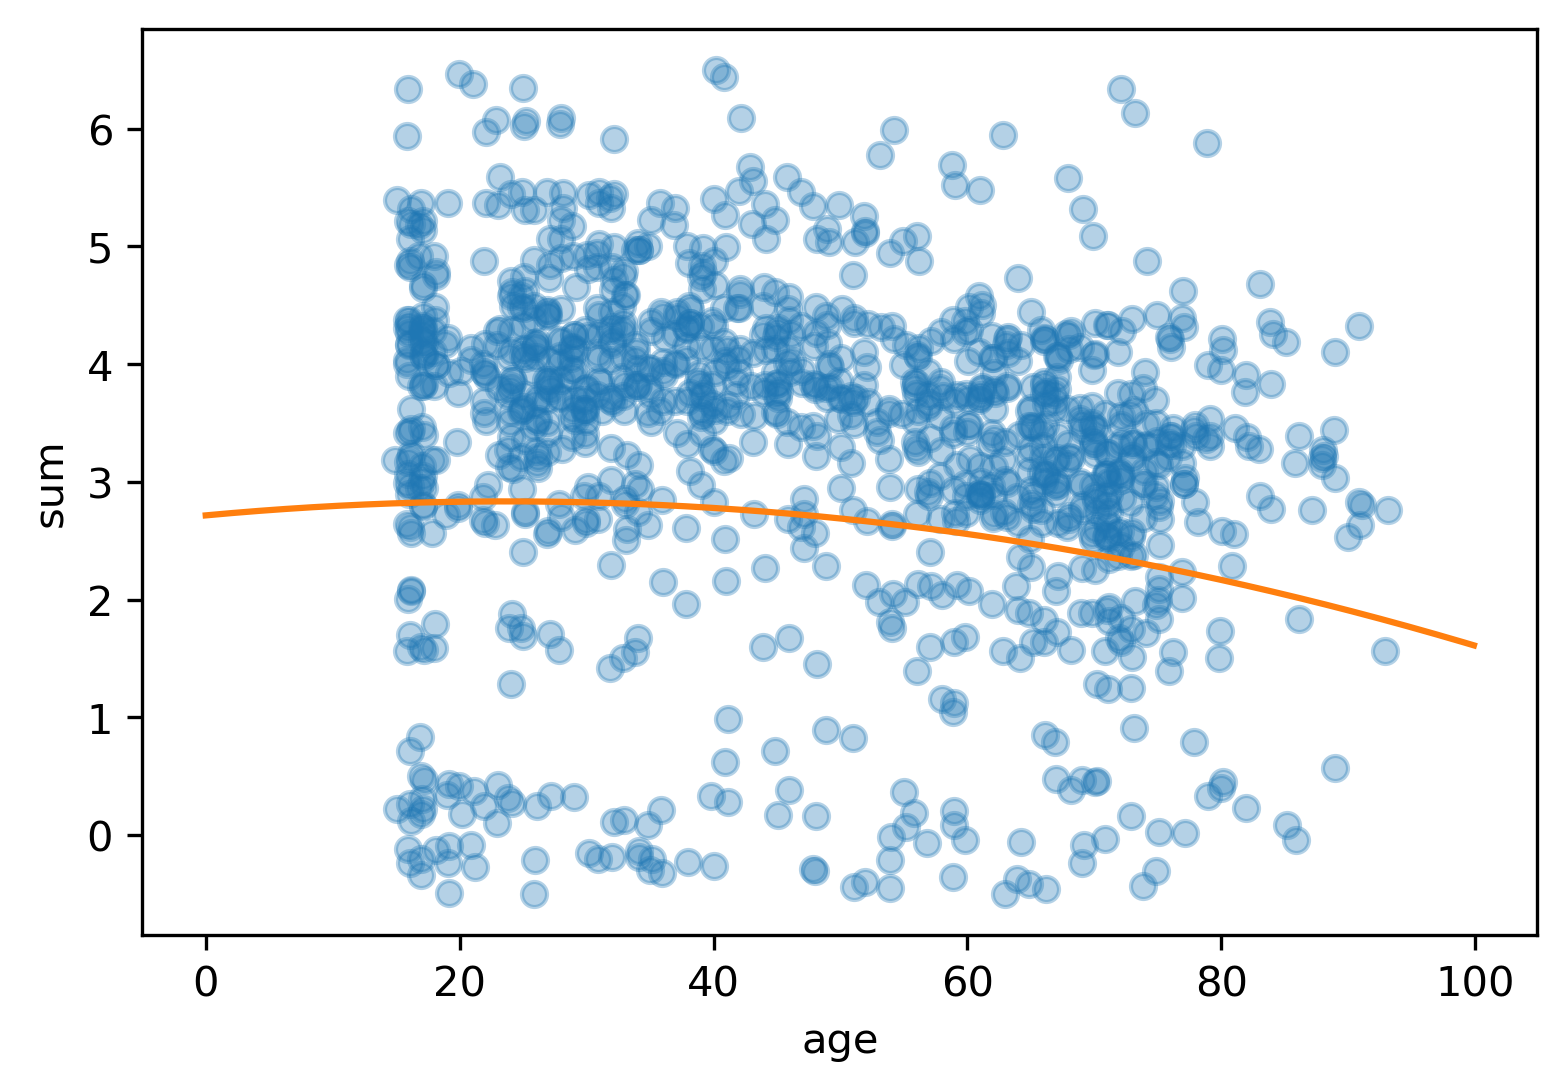

In [395]:

y = merge_data.loc[:, "sum"]
x = merge_data.loc[:, ['age','edu_index','female','dom_situation_index','hh_members_dummy','hh_children_dummy','location_urban_index']]
x.insert(1,'age_square', merge_data.loc[:,'age'].pow(2))
# x.insert(2,'age_cube', merge_data.loc[:, 'age'].pow(3))

x = sm.add_constant(x) # add constant if need intercept
model = sm.OLS(y, x).fit() # ols fit
print(model.summary()) # print fit result
with open("../bld/tables/age_square.csv", 'w') as f:
    f.write(model.summary().tables[1].as_csv())
    
import seaborn as sns
coef = model.params
sns.regplot(x="age", y="sum", data=merge_data, x_jitter = 0.2, y_jitter = 0.5, scatter_kws = {'alpha' : 1/3}, fit_reg=False)
x=np.arange(0,100, 0.1)
y=[coef['age_square']*i**2 + coef['age']*i + coef['const'] for i in x]
sns.lineplot(x, y)
# plt.show()
plt.savefig("../bld/figures/age_square.png")


                            OLS Regression Results                            
Dep. Variable:                    sum   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     11.72
Date:                Tue, 30 Mar 2021   Prob (F-statistic):           1.98e-14
Time:                        03:38:58   Log-Likelihood:                -1835.7
No. Observations:                1078   AIC:                             3687.
Df Residuals:                    1070   BIC:                             3727.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.3064 

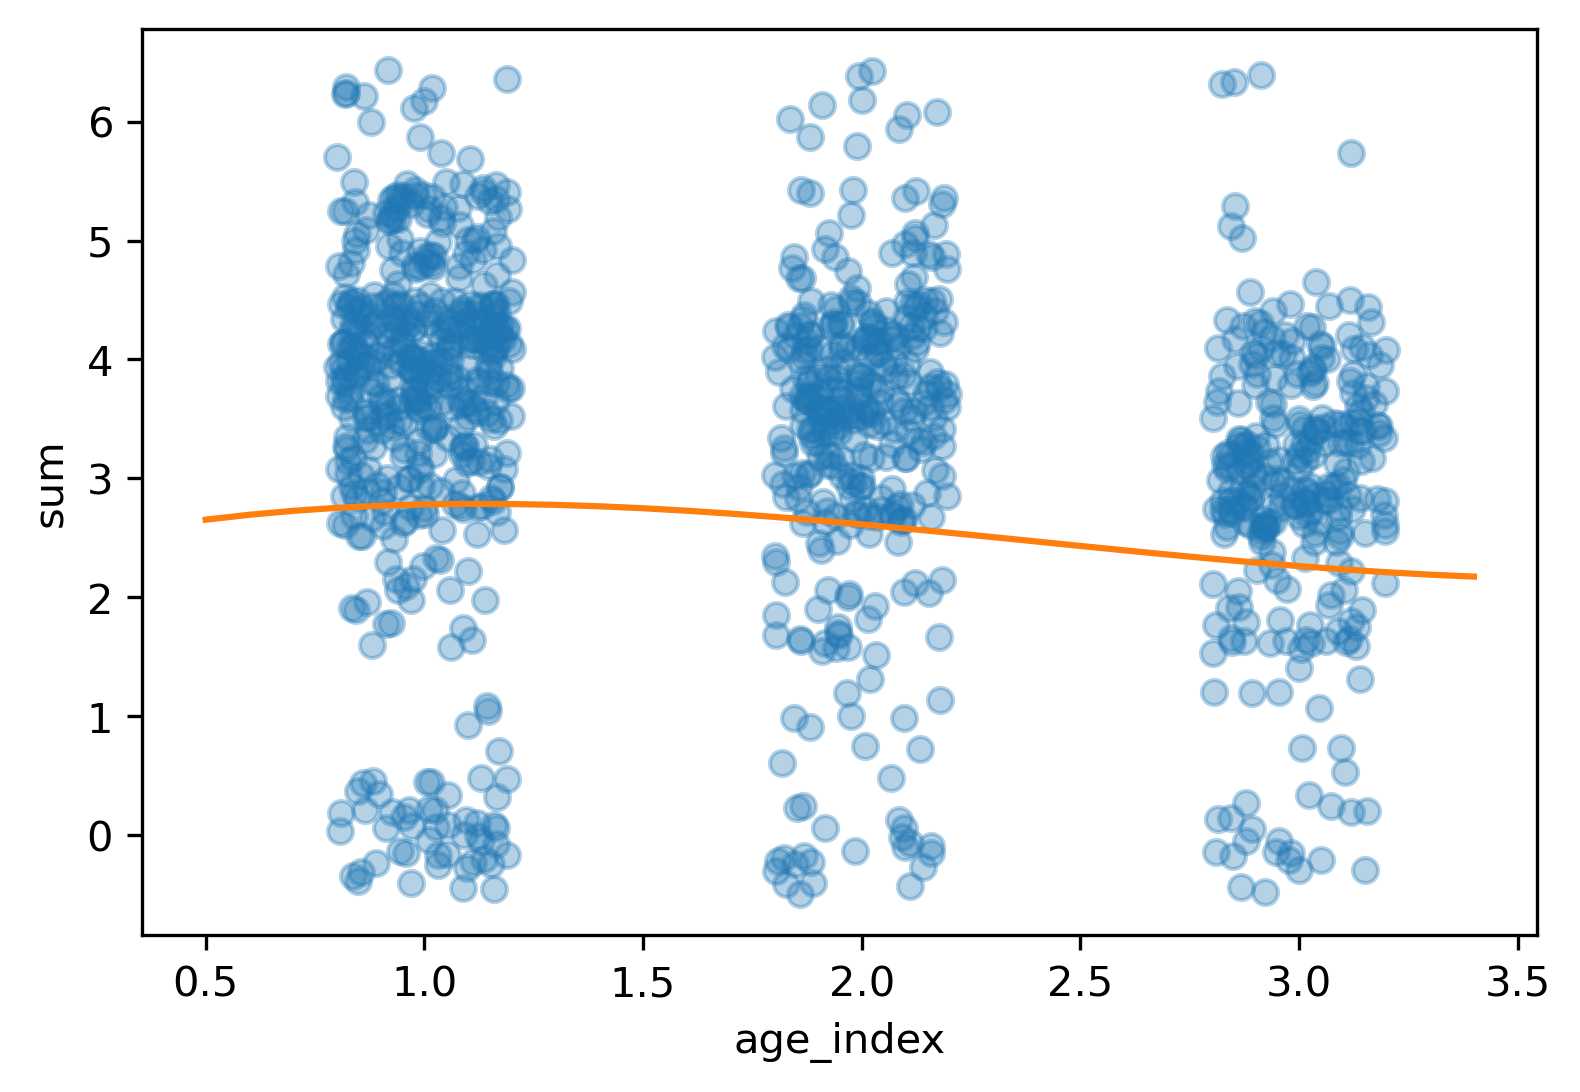

In [396]:

y = merge_data.loc[:, "sum"]
x = merge_data.loc[:, ['age_index','edu_index','female','dom_situation_index','hh_members_dummy','hh_children_dummy','location_urban_index']]
x.insert(1,'age_index_square', merge_data.loc[:,'age_index'].pow(2))
x.insert(2,'age_index_cube', merge_data.loc[:, 'age_index'].pow(3))

x = sm.add_constant(x) # add constant if need intercept
model = sm.OLS(y, x).fit() # ols fit
print(model.summary()) # print fit result
with open("../bld/tables/age_index_cube.csv", 'w') as f:
    f.write(model.summary().tables[1].as_csv())

import seaborn as sns
coef = model.params
sns.regplot(x="age_index", y="sum", data=merge_data, x_jitter = 0.2, y_jitter = 0.5, scatter_kws = {'alpha' : 1/3}, fit_reg=False)
x=np.arange(0.5,3.5, 0.1)
y=[coef['age_index_cube']*i**3 + coef['age_index_square']*i**2 + coef['age_index']*i + coef['const'] for i in x]
sns.lineplot(x, y)
# plt.show()
plt.savefig("../bld/figures/age_index_cube.png")

                            OLS Regression Results                            
Dep. Variable:                    sum   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     10.94
Date:                Tue, 30 Mar 2021   Prob (F-statistic):           6.54e-15
Time:                        03:38:59   Log-Likelihood:                -1833.1
No. Observations:                1078   AIC:                             3684.
Df Residuals:                    1069   BIC:                             3729.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.53

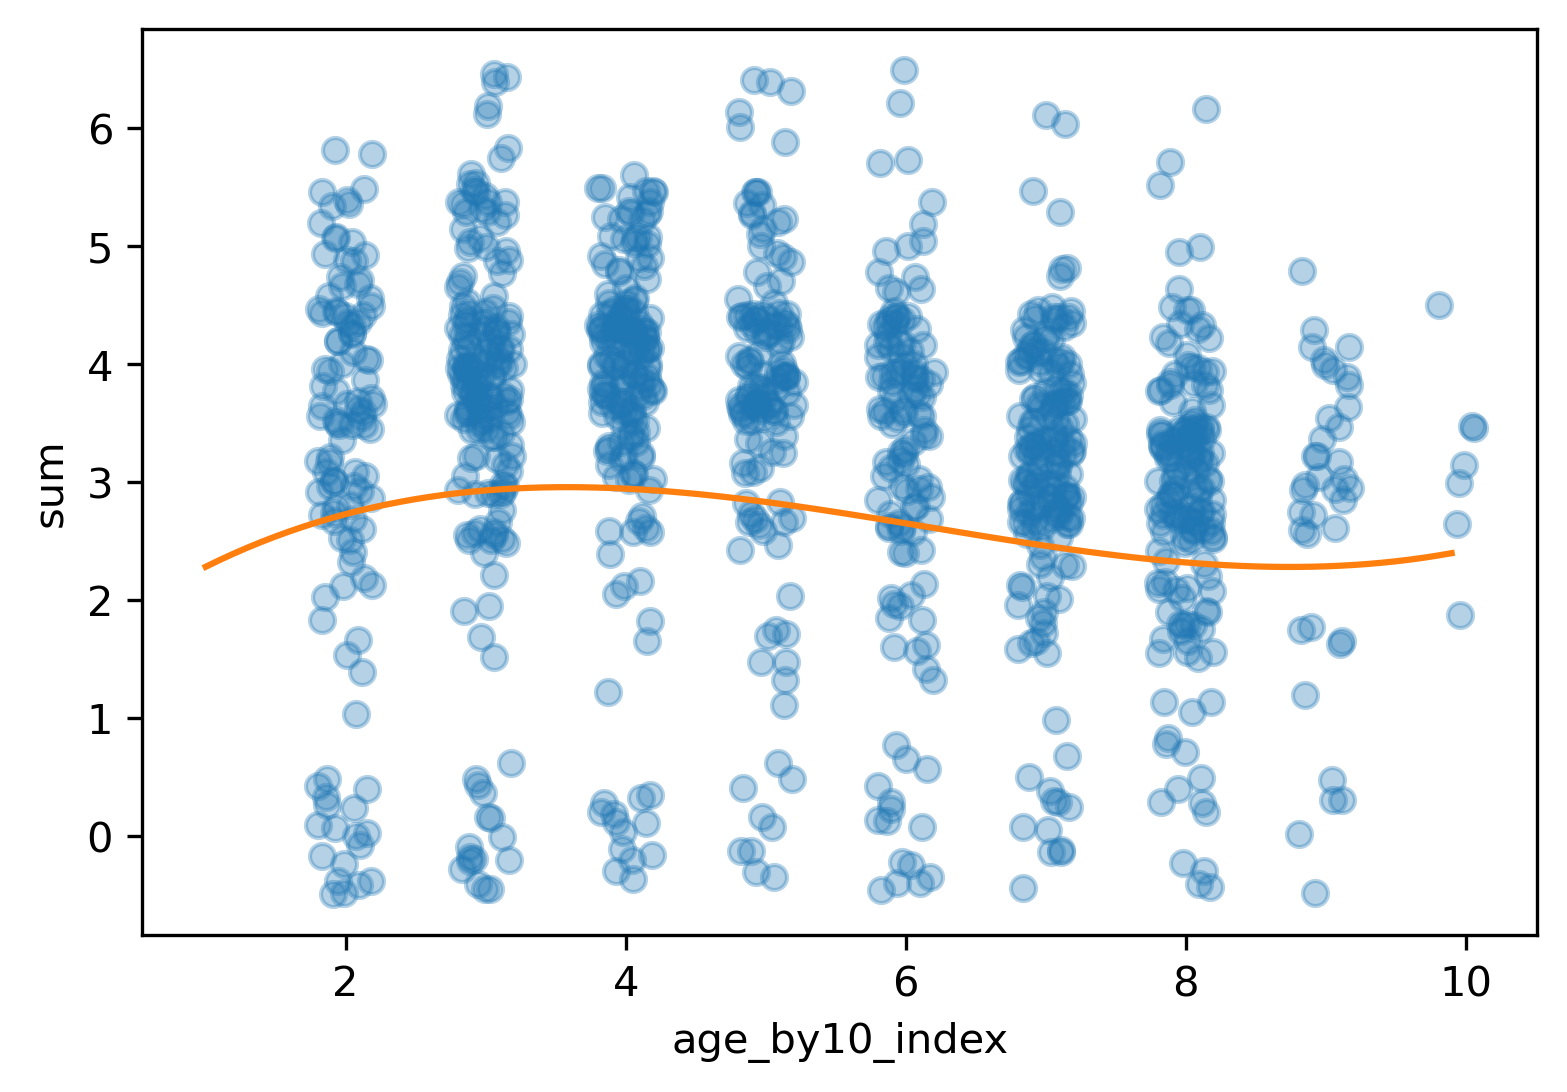

In [397]:

y = merge_data.loc[:, "sum"]
x = merge_data.loc[:, ['age_by10_index','edu_index','female','dom_situation_index','hh_members_dummy','hh_children_dummy','location_urban_index']]
x.insert(1,'age_by10_index_square', merge_data.loc[:,'age_by10_index'].pow(2))
x.insert(2,'age_by10_index_cube', merge_data.loc[:, 'age_by10_index'].pow(3))

x = sm.add_constant(x) # add constant if need intercept
model = sm.OLS(y, x).fit() # ols fit
print(model.summary()) # print fit result
with open("../bld/tables/age_by10_index_cube.csv", 'w') as f:
    f.write(model.summary().tables[1].as_csv())

import seaborn as sns

coef = model.params
sns.regplot(x="age_by10_index", y="sum", data=merge_data, x_jitter = 0.2, y_jitter = 0.5, scatter_kws = {'alpha' : 1/3}, fit_reg=False)
x=np.arange(1,10, 0.1)
y=[coef['age_by10_index_cube']*i**3 + coef['age_by10_index_square']*i**2 + coef['age_by10_index']*i + coef['const'] for i in x]
sns.lineplot(x, y)
# plt.show()
plt.savefig("../bld/figures/age_by10_index_cube.png")